<a href="https://colab.research.google.com/github/CeranOzbilgi/ai_in_Finance/blob/main/ch1_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 1 - Artificial Intelligence


> This is the first time that a computer program has defeated a human professional player in the full-sized game of Go, a feat previously thought to be at least a decade away.
                                                  —David Silver et al. (2016)





This chapter introduces general notions, ideas, and definitions from the field of artifi‐ cial intelligence (AI) for the purposes of this book. It also provides worked-out exam‐ ples for different types of major learning algorithms. In particular, “Algorithms” on page 3 takes a broad perspective and categorizes types of data, types of learning, and types of problems typically encountered in an AI context. This chapter also presents examples for unsupervised and reinforcement learning. “Neural Networks” on page 9 jumps right into the world of neural networks, which not only are central to what fol‐ lows in later chapters of the book but also have proven to be among the most power‐ ful algorithms AI has to offer nowadays. “Importance of Data” on page 22 discusses the importance of data volume and variety in the context of AI.

## Algorithms

This section introduces basic notions from the field of AI relevant to this book. It dis‐ cusses the different types of data, learning, problems, and approaches that can be sub‐ sumed under the general term AI. Alpaydin (2016) provides an informal introduction to and overview of many of the topics covered only briefly in this section, along with many examples.

### Types of Data

Data in general has two major components:
Features


> Features data (or input data) is data that is given as input to an algorithm. In a financial context, this might be, for example, the income and the savings of a potential debtor.

Labels


> Labels data (or output data) is data that is given as the relevant output to be learned, for example, by a supervised learning algorithm. In a financial context, this might be the creditworthiness of a potential debtor.



### Types of Learning

Supervised learning (SL)


> These are algorithms that learn from a given sample data set of features (input) and labels (output) values. The next section presents examples for such algo‐ rithms, like ordinary least-squares (OLS) regression and neural networks. The purpose of supervised learning is to learn the relationship between the input and output values. In finance, such algorithms might be trained to predict whether a potential debtor is creditworthy or not. For the purposes of this book, these are the most important types of algorithms.

Unsupervised learning (UL)


> These are algorithms that learn from a given sample data set of features (input) values only, often with the goal of finding structure in the data. They are sup‐ posed to learn about the input data set, given, for example, some guiding param‐ eters. Clustering algorithms fall into that category. In a financial context, such algorithms might cluster stocks into certain groups.

Reinforcement learning (RL)


> These are algorithms that learn from trial and error by receiving a reward for tak‐ ing an action. They update an optimal action policy according to what rewards and punishments they receive. Such algorithms are, for example, used for envi‐ ronments where actions need to be taken continuously and rewards are received immediately, such as in a computer game.

Because supervised learning is addressed in the subsequent section in some detail, brief examples will illustrate unsupervised learning and reinforcement learning.

## Unsupervised Learning

Simply speaking, a k-means clustering algorithm sorts n observations into k clusters. Each observation belongs to the cluster to which its mean (center) is nearest. The fol‐ lowing Python code generates sample data for which the features data is clustered. Figure 1-1 visualizes the clustered sample data and also shows that the scikit-learn KMeans algorithm used here has identified the clusters perfectly. The coloring of the dots is based on what the algorithm has learned.1


---


1 For details, see sklearn.cluster.KMeans and VanderPlas (2017, ch. 5).

In [1]:
import numpy as np 
import pandas as pd

from pylab import plt, mpl 
plt.style.use('seaborn') 
mpl.rcParams['savefig.dpi'] = 300 
mpl.rcParams['font.family'] = 'serif' 
np.set_printoptions(precision=4, suppress=True)

In [2]:
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs

In [3]:
x, y = make_blobs(n_samples=100, centers=4, random_state=500, cluster_std=1.25)

In [4]:
model = KMeans(n_clusters=4, random_state=0)

In [5]:
model.fit(x)

KMeans(n_clusters=4, random_state=0)

In [6]:
y_ = model.predict(x)

In [7]:
y_

array([0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 1, 3, 3, 0, 1, 3, 1, 3, 3, 0,
       2, 1, 2, 2, 3, 3, 2, 0, 1, 2, 2, 3, 2, 0, 2, 0, 1, 1, 1, 2, 3, 3,
       0, 2, 1, 3, 1, 3, 0, 3, 2, 3, 2, 0, 2, 1, 3, 0, 2, 3, 0, 1, 0, 3,
       2, 2, 2, 1, 0, 2, 1, 3, 1, 0, 1, 3, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1,
       3, 3, 3, 0, 0, 0, 0, 3, 0, 2, 3, 3], dtype=int32)

Text(0, 0.5, 'values')

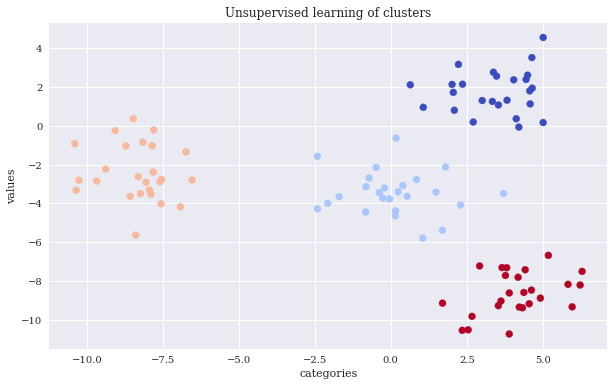

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_,  cmap='coolwarm');
# Add title and axis names
plt.title('Unsupervised learning of clusters')
plt.xlabel('categories')
plt.ylabel('values')



1.   A sample data set is created with clustered features data.
2.   A KMeans model object is instantiated, fixing the number of clusters.
3.   The model is fitted to the features data.
4.   The predictions are generated given the fitted model.
5.   The predictions are numbers from 0 to 3, each representing one cluster.


Once an algorithm such as KMeans is trained, it can, for instance, predict the cluster for a new (not yet seen) combination of features values. Assume that such an algo‐ rithm is trained on features data that describes potential and real debtors of a bank. It might learn about the creditworthiness of potential debtors by generating two clus‐ ters. New potential debtors can then be sorted into a certain cluster: “creditworthy” versus “not creditworthy.”

## Reinforcement learning

The following example is based on a coin tossing game that is played with a coin that lands 80% of the time on heads and 20% of the time on tails. The coin tossing game is heavily biased to emphasize the benefits of learning as compared to an uninformed baseline algorithm. The baseline algorithm, which bets randomly and equally distrib‐ utes on heads and tails, achieves a total reward of around 50, on average, per epoch of 100 bets played:

In [9]:
# The state space (1 = heads, 0 = tails).
ssp=[1,1,1,1,0]

In [10]:
# The action space (1 = bet on heads, 0 = bet on tails).
asp = [1, 0]

In [11]:
def epoch(): 
  tr = 0
  for _ in range(100):
# An action is randomly chosen from the action space.
    a = np.random.choice(asp) 
# A state is randomly chosen from the state space.
    s = np.random.choice(ssp)
  if a == s: 
# The total reward tr is increased by one if the bet is correct.
    tr += 1
    return tr
    

In [12]:
# The game is played for a number of epochs; each epoch is 100 bets.
rl = np.array([epoch() for _ in range(15)])
rl

array([None, 1, 1, 1, None, None, None, 1, 1, 1, None, 1, None, 1, 1],
      dtype=object)

In [13]:
# The average total reward of the epochs played is calculated.
# rl.mean()

Reinforcement learning tries to learn from what is observed after an action is taken, usually based on a reward. To keep things simple, the following learning algorithm only keeps track of the states that are observed in each round insofar as they are appended to the action space list object. In this way, the algorithm learns the bias in the game, though maybe not perfectly. By randomly sampling from the updated action space, the bias is reflected because naturally the bet will more often be heads. Over time, heads is chosen, on average, around 80% of the time. The average total reward of around 65 reflects the improvement of the learning algorithm as compared to the uninformed baseline algorithm:

In [14]:
ssp=[1,1,1,1,0]

In [15]:
def epoch():
  tr = 0
  # Resets the action space before starting (over)
  asp=[0,1]
  for _ in range(100):
    a = np.random.choice(asp)
    s = np.random.choice(asp)
    if a == s:
      tr += 1
    # Adds the observed state to the action space   
    asp.append(s)
  return tr

In [16]:
rl = np.array([epoch() for _ in range(15)])
rl

array([63, 52, 80, 75, 50, 58, 46, 48, 74, 59, 68, 54, 58, 46, 53])

In [17]:
rl.mean()

58.93333333333333

### Types of Tasks

Depending on the type of labels data and the problem at hand, two types of tasks to be learned are important:

Estimation


> Estimation (or approximation, regression) refers to the cases in which the labels data is real-valued (continuous); that is, it is technically represented as floating point numbers.

Classification


> Classification refers to the cases in which the labels data consists of a finite num‐ ber of classes or categories that are typically represented by discrete values (posi‐ tive natural numbers), which in turn are represented technically as integers.

The following section provides examples for both types of tasks.

### Types of Approaches

Some more definitions might be in order before finishing this section. This book fol‐ lows the common differentiation between the following three major terms:

Artificial intelligence (AI)


> AI encompasses all types of learning (algorithms), as defined before, and some more (for example, expert systems).

Machine learning (ML)


> ML is the discipline of learning relationships and other information about given data sets based on an algorithm and a measure of success; a measure of success might, for example, be the mean-squared error (MSE) given labels values and output values to be estimated and the predicted values from the algorithm. ML is a sub-set of AI.

Deep learning (DL)


> DL encompasses all algorithms based on neural networks. The term deep is usu‐ ally only used when the neural network has more than one hidden layer. DL is a sub-set of machine learning and so is therefore also a sub-set of AI.

DL has proven useful for a number of broad problem areas. It is suited for estimation and classification tasks, as well as for RL. In many cases, DL-based approaches perform better than alternative algorithms, such as logistic regression or kernel-based ones, like support vector machines.2 That is why this book mainly focuses on DL. DL approaches used include dense neural networks (DNNs), recurrent neural networks (RNNs), and convolutional neural networks (CNNs). More details appear in later chapters, particularly in Part III.

# Neural Networks

The previous sections provide a broader overview of algorithms in AI. This section shows how neural networks fit in. A simple example will illustrate what characterizes neural networks in comparison to traditional statistical methods, such as ordinary least-squares (OLS) regression. The example starts with mathematics and then uses linear regression for estimation (or function approximation) and finally applies neu‐ ral networks to accomplish the estimation. The approach taken here is a supervised learning approach where the task is to estimate labels data based on features data. This section also illustrates the use of neural networks in the context of classification problems.


## OLS Regression

Assume that a mathematical function is given as follows:

$f:\mathbb{R}\rightarrow \mathbb{R},y = 2x^{2}-\frac{1}{3}x^{3}$

Such a function transforms an input value x to an output value y. 